In [1]:
from MoneyModel import *

In [2]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()
    

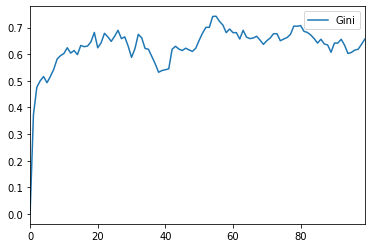

In [3]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [4]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

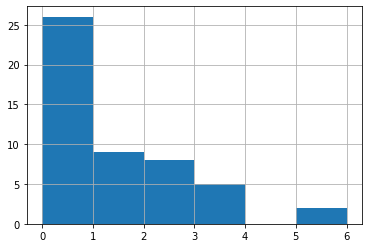

In [5]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

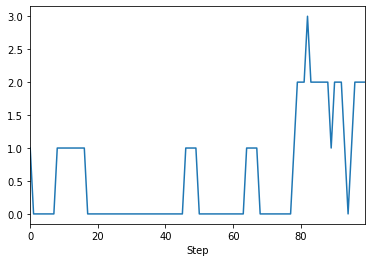

In [6]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [7]:
one_agent_wealth.head()

,Wealth
Step,
0,1
1,0
2,0
3,0
4,0


In [9]:
from mesa.batchrunner import BatchRunner

fixed_params = {
    "width": 10, 
    "height": 10
}

variable_params = {
    "N": range(10, 500, 10)
}

batch_run = BatchRunner(
    MoneyModel, 
    variable_params, 
    fixed_params, 
    iterations=5, 
    max_steps=100, 
    model_reporters={
        "Gini": compute_gini
    }
)

batch_run.run_all()

245it [03:46,  1.08it/s]


In [10]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()

,N,Run,Gini,width,height
0,10,0,0.54,10,10
1,10,1,0.48,10,10
2,10,2,0.64,10,10
3,10,3,0.54,10,10
4,10,4,0.62,10,10


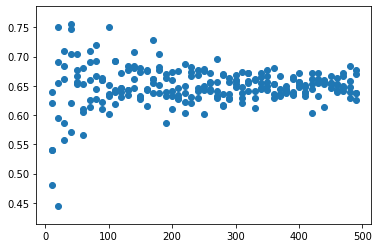

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(run_data.N, run_data.Gini)